# Getting started with pyspark-sql
https://levelup.gitconnected.com/using-docker-and-pyspark-134cd4cab867

In [1]:
# import necessary libraries
import pandas as pd 
import numpy
import matplotlib.pyplot as plt 
from pyspark.sql import SparkSession
# create sparksession
spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [2]:
df = spark.read.csv('data/Vermont_Vendor_Payments.csv', header='true', inferSchema = True)
df = df.withColumn("Amount", df["Amount"].cast("double"))

In [3]:
#we can use the columns attribute just like with pandas
columns = df.columns
print('The column Names are:')
for i in columns:
    print(i)

The column Names are:
Quarter Ending
Department
UnitNo
Vendor Number
Vendor
City
State
DeptID Description
DeptID
Amount
Account
AcctNo
Fund Description
Fund


In [4]:
print('The total number of rows is:', df.count(), '\nThe total number of columns is:', len(df.columns))

The total number of rows is: 1523230 
The total number of columns is: 14


In [5]:
# The .show() method prints the first 20 rows of the dataframe by default
#show first 5 rows
df.show(5)

+--------------+--------------------+------+-------------+--------------------+-----------+-----+-------------------+----------+-------+--------------------+------+--------------------+-----+
|Quarter Ending|          Department|UnitNo|Vendor Number|              Vendor|       City|State| DeptID Description|    DeptID| Amount|             Account|AcctNo|    Fund Description| Fund|
+--------------+--------------------+------+-------------+--------------------+-----------+-----+-------------------+----------+-------+--------------------+------+--------------------+-----+
|    12/31/2018|         Corrections|  3480|   0000006745|        White Market|Lyndonville|   VT| Northeast Regional|3480004250|  13.47|   Meat/Fish/Poultry|520701|        General Fund|10000|
|    12/31/2018|Transportation Ag...|  8100|   0000043671|Agency of Digital...| Montpelier|   VT|Program Development|8100001100| 3364.0|Hardware-Desktop ...|522216|Transp Fund - Non...|20105|
|    12/31/2018|         Corrections|  3

In [7]:
# The .head() method can also be used to display the first row. This prints much nicer in the notebook.
df.head()

Row(Quarter Ending='12/31/2018', Department='Corrections', UnitNo=3480, Vendor Number='0000006745', Vendor='White Market', City='Lyndonville', State='VT', DeptID Description='Northeast Regional', DeptID='3480004250', Amount=13.47, Account='Meat/Fish/Poultry', AcctNo='520701', Fund Description='General Fund', Fund='10000')

In [9]:
# show first 3 rows
df.head(3)

[Row(Quarter Ending='12/31/2018', Department='Corrections', UnitNo=3480, Vendor Number='0000006745', Vendor='White Market', City='Lyndonville', State='VT', DeptID Description='Northeast Regional', DeptID='3480004250', Amount=13.47, Account='Meat/Fish/Poultry', AcctNo='520701', Fund Description='General Fund', Fund='10000'),
 Row(Quarter Ending='12/31/2018', Department='Transportation Agency', UnitNo=8100, Vendor Number='0000043671', Vendor='Agency of Digital Services-CIT-Cust Supp', City='Montpelier', State='VT', DeptID Description='Program Development', DeptID='8100001100', Amount=3364.0, Account='Hardware-Desktop & Laptop PCs', AcctNo='522216', Fund Description='Transp Fund - Nondedicated', Fund='20105'),
 Row(Quarter Ending='12/31/2018', Department='Corrections', UnitNo=3480, Vendor Number='0000009294', Vendor='Pitney Bowes Inc', City='Louisville', State='KY', DeptID Description='Rutland P&P', DeptID='3480004690', Amount=116.25, Account='Rental - Auto', AcctNo='514550', Fund Descrip

In [10]:
# Like in pandas, we can call the describe method to get basic numerical summaries of the data. We need to use the show method to print it to the notebook
df.describe().show()

+-------+--------------+--------------------+------------------+------------------+--------------------+--------+-----------------+------------------+--------------------+--------------------+-------------------+------------------+--------------------+--------------------+
|summary|Quarter Ending|          Department|            UnitNo|     Vendor Number|              Vendor|    City|            State|DeptID Description|              DeptID|              Amount|            Account|            AcctNo|    Fund Description|                Fund|
+-------+--------------+--------------------+------------------+------------------+--------------------+--------+-----------------+------------------+--------------------+--------------------+-------------------+------------------+--------------------+--------------------+
|  count|       1523230|             1523230|           1523230|           1523230|             1523230|  780907|          1523182|           1522693|             1523230|       

## Querying the data

In [11]:
# I will start by creating a temporary table query with SQL
df.createOrReplaceTempView('VermontVendor')
spark.sql(
'''
SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor
LIMIT 10
'''
).show()

+--------------+--------------------+-------+-----+
|Quarter Ending|          Department| Amount|State|
+--------------+--------------------+-------+-----+
|    12/31/2018|         Corrections|  13.47|   VT|
|    12/31/2018|Transportation Ag...| 3364.0|   VT|
|    12/31/2018|         Corrections| 116.25|   KY|
|    12/31/2018|Transportation Ag...|1020.42|   CT|
|    12/31/2018|         Corrections| 217.66|   VT|
|    12/31/2018|         Corrections|   20.0|   VT|
|    12/31/2018|         Corrections| 499.31|   MA|
|    12/31/2018|Transportation Ag...| 107.97|   VT|
|    12/31/2018|Forests, Parks & ...| 1800.0|   VT|
|    12/31/2018|Transportation Ag...|  36.42|   VT|
+--------------+--------------------+-------+-----+



In [12]:
# using pythonic syntax
df.select('Quarter Ending', 'Department', 'Amount', 'State').show(10)

+--------------+--------------------+-------+-----+
|Quarter Ending|          Department| Amount|State|
+--------------+--------------------+-------+-----+
|    12/31/2018|         Corrections|  13.47|   VT|
|    12/31/2018|Transportation Ag...| 3364.0|   VT|
|    12/31/2018|         Corrections| 116.25|   KY|
|    12/31/2018|Transportation Ag...|1020.42|   CT|
|    12/31/2018|         Corrections| 217.66|   VT|
|    12/31/2018|         Corrections|   20.0|   VT|
|    12/31/2018|         Corrections| 499.31|   MA|
|    12/31/2018|Transportation Ag...| 107.97|   VT|
|    12/31/2018|Forests, Parks & ...| 1800.0|   VT|
|    12/31/2018|Transportation Ag...|  36.42|   VT|
+--------------+--------------------+-------+-----+
only showing top 10 rows



In [13]:
# filter temporary table created above
spark.sql(
'''
SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor 
WHERE Department = 'Education'
LIMIT 10
'''
).show()

+--------------+----------+---------+-----+
|Quarter Ending|Department|   Amount|State|
+--------------+----------+---------+-----+
|    09/30/2013| Education| 73581.07|   VT|
|    09/30/2013| Education|  2053.03|   VT|
|    09/30/2013| Education|   319.04|   VT|
|    09/30/2013| Education|    133.2|   VT|
|    09/30/2013| Education| 89474.24|   VT|
|    09/30/2013| Education|    312.9|   VT|
|    09/30/2013| Education|    540.0|   CA|
|    09/30/2013| Education|    39.66|   VT|
|    09/30/2013| Education|323742.41|   VT|
|    09/30/2013| Education|   327.16|   VT|
+--------------+----------+---------+-----+



In [14]:
# the pythonic way gives a similar result
df.select('Quarter Ending', 'Department', 'Amount', 'State').filter(df['Department'] == 'Education').show(10)

+--------------+----------+---------+-----+
|Quarter Ending|Department|   Amount|State|
+--------------+----------+---------+-----+
|    09/30/2013| Education| 73581.07|   VT|
|    09/30/2013| Education|  2053.03|   VT|
|    09/30/2013| Education|   319.04|   VT|
|    09/30/2013| Education|    133.2|   VT|
|    09/30/2013| Education| 89474.24|   VT|
|    09/30/2013| Education|    312.9|   VT|
|    09/30/2013| Education|    540.0|   CA|
|    09/30/2013| Education|    39.66|   VT|
|    09/30/2013| Education|323742.41|   VT|
|    09/30/2013| Education|   327.16|   VT|
+--------------+----------+---------+-----+
only showing top 10 rows



## Plotting

one cannot directly create plots with a Spark dataframe. The simplest solution is to simply use the .toPandas() method to convert the result of Spark computations to a pandas dataframe

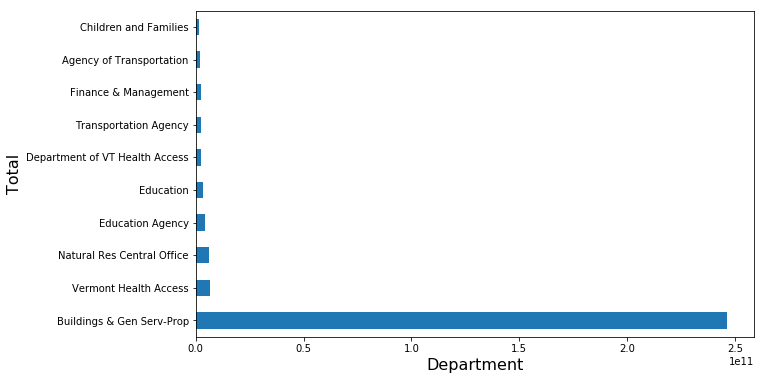

In [15]:
plot_df = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
ORDER BY Total DESC
LIMIT 10
'''
).toPandas()

fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'Department', y = 'Total', kind = 'barh', color = 'C0', ax = ax, legend = False)
ax.set_xlabel('Department', size = 16)
ax.set_ylabel('Total', size = 16)
plt.savefig('barplot.png')
plt.show()

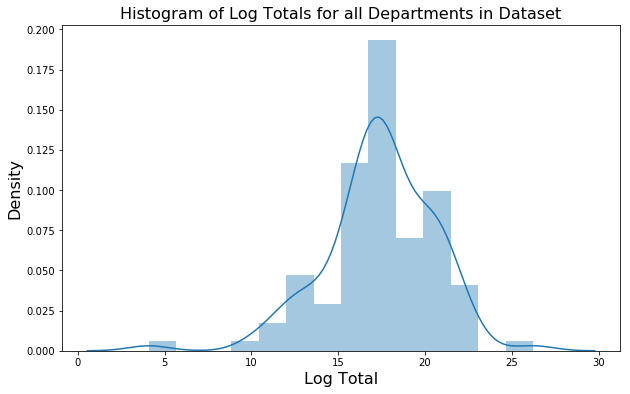

In [16]:
# USE SEABORN
import numpy as np
import seaborn as sns
plot_df2 = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
'''
).toPandas()
plt.figure(figsize = (10,6))
sns.distplot(np.log(plot_df2['Total']))
plt.title('Histogram of Log Totals for all Departments in Dataset', size = 16)
plt.ylabel('Density', size = 16)
plt.xlabel('Log Total', size = 16)
plt.savefig('distplot.png')
plt.show()